In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list

# import CMS_lumi, tdrstyle
# tdrstyle.setTDRStyle()
# CMS_lumi.writeExtraText = 1
# CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.17/01


In [2]:
fpath = {}
tree = {}
process = {}
process_short = {}

fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
process['glueBall'] = 'pp #rightarrow h*h* #rightarrow jj#nu#nu'
process_short['glueBall'] = 'pp #rightarrow h*h* #rightarrow jj#nu#nu'

#fpath['tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_BPHMC_merged_1-300.root'
#process['tau'] = 'B_{0} #rightarrow D*^{-}(#bar{D}_{0}(K^{+}#pi^{-})#pi^{-})#tau^{+}(#mu^{+}#nu#bar{#nu})#nu'
#process_short['tau'] = 'B #rightarrow D*#tau#nu'

# fpath['Dst_mu'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_BPHMC_merged.root'
# process['Dst_mu'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#mu^{+}#nu'

# fpath['Dst_tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_BPHMC_merged.root'
# process['Dst_tau'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#tau^{+}(#mu^{+}#nu#nu)#nu'

for k,v in fpath.iteritems():
    print k, v
    tree[k] = rtnp.root2array(v)
    #tree[k] = rtnp.tree2array(v)
    #jet_max_pt_array = [np.max(x) for x in tree[k]["jetPt"]]
    a = tree[k]["jetPt"]
    print a[:-1][0]

glueBall /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root
[17.795286  12.522762  11.878623   5.5633655]


In [3]:
T = tree['glueBall']

In [4]:
#get first jet pt per event
#T['jetPt'][0]
first_jet_pt = [x[0] if len(x) else -1 for x in T['jetPt']]

In [5]:
#get max jet pt per event
max_jet_pt = [np.max(x) if len(x) else -1 for x in T['jetPt']]
#print max_jet_pt

In [6]:
#store jet-pt array per event in a list
first_jet_pt_arr = []
for x in T['jetPt']:
    if len(x) == 0:
        break
    #print x
    first_jet_pt_arr.append(x[0])

In [9]:
#Create Numpy Arrays for (['jetPt', 'jetEta', 'jetPhi', 'jetE']) with the first 4 jets
four_highest_jet_var = {}

for v in ['jetPt', 'jetEta', 'jetPhi', 'jetE']:
    tmp = []
    for x in T[v]:
        aux = -999*np.ones(4)
        for i, xx in enumerate(x):
            #print i, xx
            #i: jet index; xx: first jet pt 
            if i > 3:
                break
                #only require 4 highest pt jet
            aux[i] = xx
        tmp.append(aux)

    four_highest_jet_var[v] = np.array(tmp)#numpy array (n_entries,4)
    #print four_highest_jet_var[v].shape
    

In [10]:
#Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
ten_gen_var = {}
n_gen = 10
for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
    tmp_2 = []
    for x in T[v]:
        #print x
        aux = -999*np.ones(n_gen)
        for i, xx in enumerate(x):
            #print xx
            if i >= n_gen:
                break
            aux[i] = xx
        tmp_2.append(aux)

    ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
print ten_gen_var['gParticlePt'][:,4]

[ 6.64531326 30.32988739 34.8320694  ... 17.59085464 37.21101761
 11.10337448]


In [11]:
sel = four_highest_jet_var['jetPt'][:,1] > -998
print sel
#print four_highest_jet_var['jetPt'][:,1]

out = np.hypot(four_highest_jet_var['jetPt'][sel,0], four_highest_jet_var['jetPt'][sel,1])
#print four_highest_jet_var['jetPt'][sel,0]
#print four_highest_jet_var['jetPt'][sel,1]
print out
ttt = np.array([[0,1,2,3,4,5,6,7,8,9],
              [0,1,2,3,4,5,6,7,8,9]])
print ttt[ttt>4]

[ True  True  True ...  True  True  True]
[21.7598664  22.90677092 17.34232739 ... 26.87657846 47.75081422
 34.36418181]
[5 6 7 8 9 5 6 7 8 9]


In [12]:
#GOTTA get some TLorentz Vectors for the LLPs
#gen particle id for bottom quark and anti-bottom quark
sel_b = ten_gen_var['gParticleId'] == 5
sel_bhat = ten_gen_var['gParticleId'] == -5

#4-variables for bottom quark
b_pt  = ten_gen_var['gParticlePt'][sel_b]
b_eta = ten_gen_var['gParticleEta'][sel_b]
b_phi = ten_gen_var['gParticlePhi'][sel_b]
b_e = ten_gen_var['gParticleE'][sel_b]


#4-variables for anti-bottom quark
bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
bhat_e = ten_gen_var['gParticleE'][sel_bhat]

#central fraction of b-quarks, within eta < 1.48
b_central = float(len(b_eta[np.abs(b_eta) < 1.48]))/float(len(b_eta))
#central fraction of anti-b-quarks, within eta < 1.48
bhat_central = float(len(b_eta[np.abs(bhat_eta) < 1.48]))/float(len(bhat_eta))

print "central (|eta|<1.48) b-quark fraction:", b_central
print "central (|eta|<1.48) anti-b-quark fraction:", bhat_central
print "barrel-barrel fraction of events = ", round (b_central*bhat_central*100 , 2), " %"
print "barrel-endcap fraction of events = ", round (b_central*(1-bhat_central) + (1-b_central)*bhat_central*100 , 2), " %"
print "endcap-endcap fraction of events = ", round ((1-b_central)*(1-bhat_central)*100 , 2), " %"

llp_p4 = []
b_p4 = []
bhat_p4 = []
for i in range(len(b_pt)):
    tmp_p4_b    = rt.TLorentzVector()
    tmp_p4_bhat = rt.TLorentzVector()
    tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
    tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
    b_p4.append(tmp_p4_b)
    bhat_p4.append(tmp_p4_bhat)
    llp_p4.append(tmp_p4_b+tmp_p4_bhat)


llp_pt  = [x.Pt() for x in llp_p4]
llp_eta = [x.Eta() for x in llp_p4]
llp_phi = [x.Phi() for x in llp_p4]
llp_e   = [x.E() for x in llp_p4]
#for i in llp_p4:
#    print i.M()
#print sum_pt
#for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
    #print pid, pt, eta
    #print [y if x == 5 else -1 for x,y in zip(pid,pt)]

central (|eta|<1.48) b-quark fraction: 0.560120514927
central (|eta|<1.48) anti-b-quark fraction: 0.566967953985
barrel-barrel fraction of events =  31.76  %
barrel-endcap fraction of events =  25.18  %
endcap-endcap fraction of events =  19.05  %


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


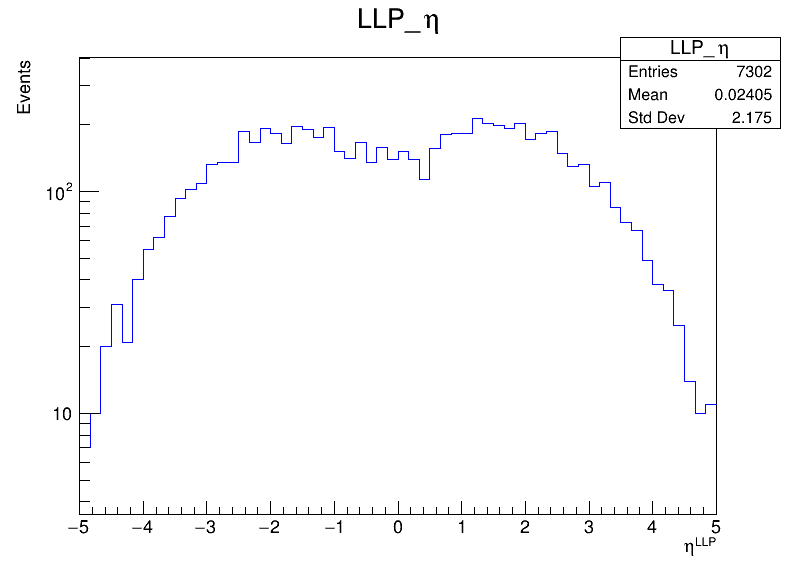

In [25]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
h['llp_eta'] = create_TH1D(llp_eta, axis_title=['#eta^{LLP}', 'Events'], name='LLP_#eta', binning=[60,-5,5])
h['llp_eta'].SetLineColor(4)
c.SetLogy()
h['llp_eta'].Draw()
c.Draw()

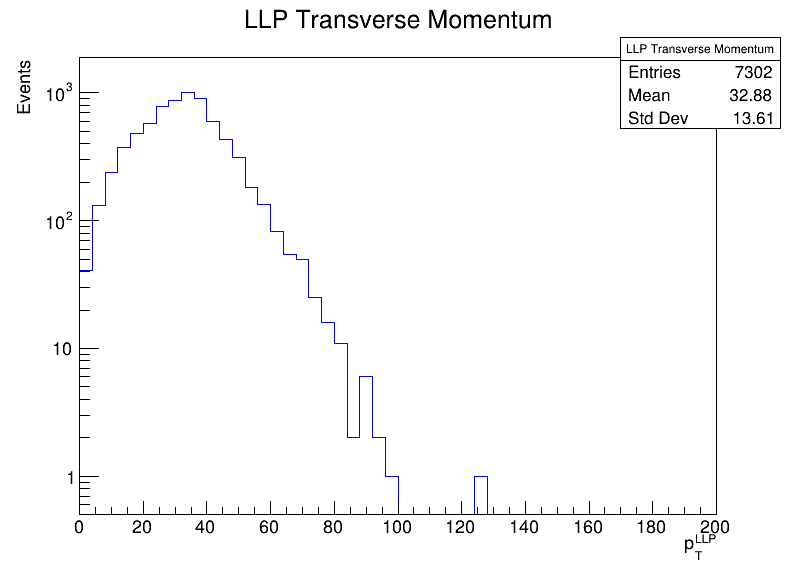

In [26]:
#c = rt.TCanvas('c','c', 800, 600)
h['llp_pt'] = create_TH1D(llp_pt, axis_title=['p_{T}^{LLP}', 'Events'], name='LLP Transverse Momentum', binning=[50,0,200])
h['llp_pt'].SetLineColor(4)
c.SetLogy()
h['llp_pt'].Draw()
c.Update()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: #eta of b and #bar{b} (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bhat_eta (Potential memory leak).


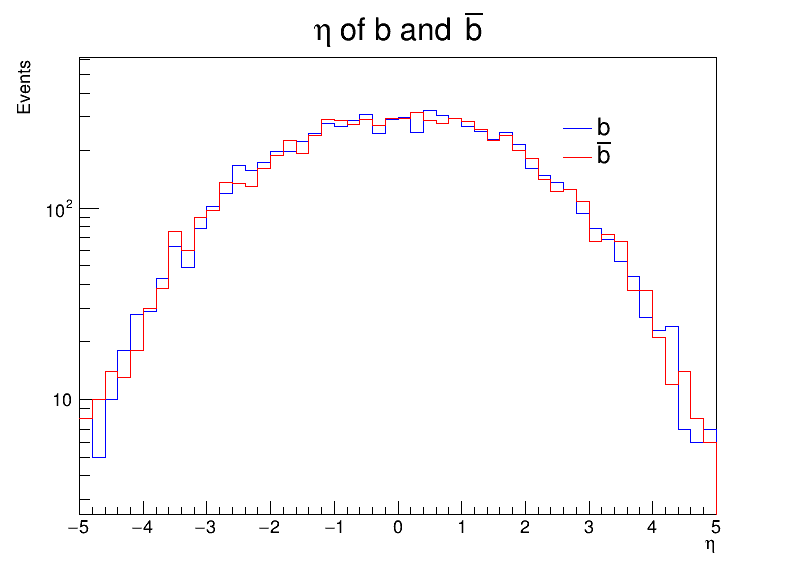

In [45]:
h['b_eta'] = create_TH1D(b_eta, axis_title=['#eta', 'Events'], name='#eta of b and #bar{b}', binning=[50,-5,5])
h['b_eta'].SetLineColor(4)
h['bhat_eta'] = create_TH1D(bhat_eta, axis_title=['#eta', 'Events'], name='bhat_eta', binning=[50,-5,5])
h['bhat_eta'].SetLineColor(2)
c.SetLogy()
h['b_eta'].SetStats(0)
h['b_eta'].Draw()
h['bhat_eta'].Draw('same')
leg = rt.TLegend(0.7,0.7,0.9,0.8)
leg.SetBorderSize(0)
leg.AddEntry(h['b_eta'],'b','l')
leg.AddEntry(h['bhat_eta'],'#bar{b}','l')
leg.Draw('same')
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: p_{T} of b and #bar{b} (Potential memory leak).


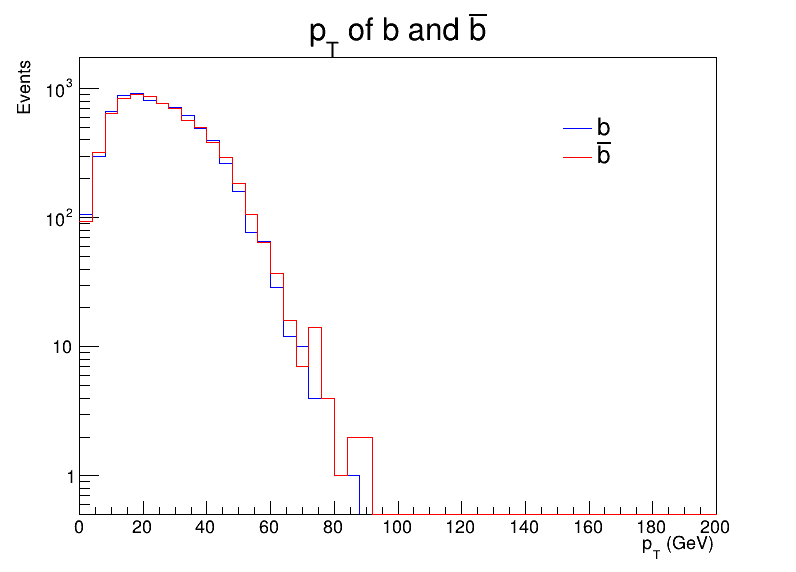

In [56]:
h['b_pt'] = create_TH1D(b_pt, axis_title=['p_{T} (GeV)', 'Events'], name='p_{T} of b and #bar{b}', binning=[50,0,200])
h['b_pt'].SetLineColor(4)
h['bhat_pt'] = create_TH1D(bhat_pt, axis_title=['p_{T} (GeV)', 'Events'], name='', binning=[50,0,200])
h['bhat_pt'].SetLineColor(2)
c.SetLogy()
h['b_pt'].SetStats(0)
h['b_pt'].Draw()
h['bhat_pt'].Draw('same')
legpt = rt.TLegend(0.7,0.7,0.9,0.8)
legpt.SetBorderSize(0)
legpt.AddEntry(h['b_pt'],'b','l')
legpt.AddEntry(h['bhat_pt'],'#bar{b}','l')
legpt.Draw('same')
c.Draw()

In [57]:
DecayChannelBr = {}
DecayChannelBr['mu'] = 4.88e-2 * 67e-2 * 3.89e-2
DecayChannelBr['tau'] = 1.67e-2 * 17.39e-2 * 67e-2 * 3.89e-2

In [60]:
weights = {}

sumBr = np.sum(np.array(DecayChannelBr.values()))
for k,v in DecayChannelBr.iteritems():
    weights[k] = v/sumBr
    
print weights

{'mu': 0.9438317596679413, 'tau': 0.05616824033205858}


# Muon Reco efficiency

Distance between the Gen mu and best matching track

In [63]:
binning = [100, -0.1, 0.1, 50, 0, 0.05]

c = rt.TCanvas('c_mu_pt', 'c_mu_pt',50,50,800,600)
c.SetTickx(0)
c.SetTicky(0)

n = 'tau'

s = np.column_stack((tree[n]['mu_RecoMC_dpt'], tree[n]['mu_RecoMC_dR']))

h2 = create_TH2D(s, title='', axis_title=['dpt', 'dR' , ''], binning=binning)

h2.Draw('colz')
CMS_lumi.CMS_lumi(c, -1, 0)
c.Draw()

KeyError: 'tau'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_mu_pt


In [64]:
binning = [100, 0, 1500.]

n = 'tau'
#for n in ['glueBall', '']:
for n in ['glueBall']:
    leg = rt.TLegend(0.4,0.6,0.95,0.9, process[n])
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    leg.GetListOfPrimitives().First().SetTextAlign(22) 

    a = tree[n]['jetPt'][:-1]
    h_all = create_TH1D(tree[n]['jetPt'][3:], name='h_'+n+'_mu_pt', binning=binning, axis_title=['P_{T}^{#mu} [GeV]', 'Prob / {:.1f} GeV'.format(binning[2]/binning[0])])
    N_norm = h_all.GetEntries()
    h_all.Scale(1./N_norm)
    leg.AddEntry(h_all, 'Gen #mu, OF={:1.1e}'.format(h_all.GetBinContent(binning[0]+1)), 'le')

    #sel = np.logical_and(np.abs(tree[n]['mu_RecoMC_dpt']) < 0.05, tree[n]['mu_RecoMC_dR'] < 0.015)
    #h_recoTrk = create_TH1D(tree[n]['muReco_pt'][sel], name='h_'+n+'_muTrack_pt', binning=binning)
    #h_recoTrk.Scale(1./N_norm)
    #h_recoTrk.SetLineColor(2)
    #leg.AddEntry(h_recoTrk, 'RECO #mu (Track), #epsilon={:.2f}, OF={:1.1e}'.format(np.sum(sel)/N_norm, h_recoTrk.GetBinContent(binning[0]+1)), 'le')

    #sel = tree[n]['muReco_isStandAloneMuon']>0.5
    #h_recoMu = create_TH1D(tree[n]['muReco_pt'][sel], name='h_'+n+'_muReco_pt', binning=binning)
    #h_recoMu.Scale(1./N_norm)
    #h_recoMu.SetLineColor(4)
    #leg.AddEntry(h_recoMu, 'RECO #mu (StandAlone), #epsilon={:.2f}, OF={:1.1e}'.format(np.sum(sel)/N_norm, h_recoMu.GetBinContent(binning[0]+1)), 'le')

    c = rt.TCanvas('c_'+n+'_pt', 'c_'+n+'_pt',50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)

    h_all.Draw()
    #h_recoTrk.Draw('SAME')
    #h_recoMu.Draw('SAME')
    leg.Draw()


    CMS_lumi.CMS_lumi(c, -1, 0)
    c.Draw()
    #donotdelete.append([leg, h_all, h_recoTrk, h_recoMu, c])
    c.SaveAs('../fig/1902_1/Probe_mu_MC_eff_B2'+n+'.png')

ValueError: setting an array element with a sequence.

# Soft Pion Reco efficiency

In [65]:
binning = [100, -0.1, 0.1, 50, 0, 0.05]

c = rt.TCanvas('c', 'c',50,50,800,600)
c.SetTickx(0)
c.SetTicky(0)

n = 'tau'

s = np.column_stack((tree[n]['pisoft_RecoMC_dpt'], tree[n]['pisoft_RecoMC_dR']))

h2 = create_TH2D(s, title='', axis_title=['dpt', 'dR' , ''], binning=binning)

h2.Draw('colz')
CMS_lumi.CMS_lumi(c, -1, 0)
c.Draw()

KeyError: 'tau'

In [66]:
binning = [50, 0, 2.5]

for n in ['mu', 'tau']:
    leg = rt.TLegend(0.4,0.6,0.95,0.9, process[n])
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    leg.GetListOfPrimitives().First().SetTextAlign(22) 

    h_all = create_TH1D(tree[n]['pisoft_pt'], name='h_'+n+'_pisoft_pt', binning=binning, axis_title=['P_{T}^{#pi_{soft}} [GeV]', 'Prob / {:.1f} GeV'.format(binning[2]/binning[0])])
    N_norm = h_all.GetEntries()
    h_all.Scale(1./N_norm)
    leg.AddEntry(h_all, 'Gen #pi soft, OF={:1.1e}'.format(h_all.GetBinContent(binning[0]+1)), 'le')

    sel = np.logical_and(np.abs(tree[n]['pisoft_RecoMC_dpt']) < 0.05, tree[n]['pisoft_RecoMC_dR'] < 0.02)
    h_recoTrk = create_TH1D(tree[n]['pisoftReco_pt'][sel], name='h_'+n+'_pisoftTrack_pt', binning=binning)
    h_recoTrk.Scale(1./N_norm)
    h_recoTrk.SetLineColor(2)
    leg.AddEntry(h_recoTrk, 'RECO #pi soft (Track), #epsilon={:.2f}, OF={:1.1e}'.format(np.sum(sel)/N_norm, h_recoTrk.GetBinContent(binning[0]+1)), 'le')

    c = rt.TCanvas('c_'+n+'_pt', 'c_'+n+'_pt',50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)

    h_all.Draw()
    h_recoTrk.Draw('SAME')
    leg.Draw()


    CMS_lumi.CMS_lumi(c, -1, 0)
    c.Draw()
    donotdelete.append([leg, h_all, h_recoTrk, h_recoMu, c])
    c.SaveAs('../fig/1902_1/Probe_softPi_MC_eff_B2'+n+'.png')

KeyError: 'mu'

# Kaon Reco efficiency

In [67]:
binning = [50, 0, 20.]

for n in ['mu', 'tau']:
    leg = rt.TLegend(0.4,0.6,0.95,0.9, process[n])
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    leg.GetListOfPrimitives().First().SetTextAlign(22) 

    h_all = create_TH1D(tree[n]['K_pt'], name='h_'+n+'_K_pt', binning=binning, axis_title=['P_{T}^{K} [GeV]', 'Prob / {:.1f} GeV'.format(binning[2]/binning[0])])
    N_norm = h_all.GetEntries()
    h_all.Scale(1./N_norm)
    leg.AddEntry(h_all, 'Gen, OF={:1.1e}'.format(h_all.GetBinContent(binning[0]+1)), 'le')

    sel = np.logical_and(np.abs(tree[n]['K_RecoMC_dpt']) < 0.05, tree[n]['K_RecoMC_dR'] < 0.02)
    h_recoTrk = create_TH1D(tree[n]['KReco_pt'][sel], name='h_'+n+'_KTrack_pt', binning=binning)
    h_recoTrk.Scale(1./N_norm)
    h_recoTrk.SetLineColor(2)
    leg.AddEntry(h_recoTrk, 'RECO, #epsilon={:.2f}, OF={:1.1e}'.format(np.sum(sel)/N_norm, h_recoTrk.GetBinContent(binning[0]+1)), 'le')

    c = rt.TCanvas('c_'+n+'_pt', 'c_'+n+'_pt',50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)

    h_all.Draw()
    h_recoTrk.Draw('SAME')
    leg.Draw()


    CMS_lumi.CMS_lumi(c, -1, 0)
    c.Draw()
    donotdelete.append([leg, h_all, h_recoTrk, h_recoMu, c])
    c.SaveAs('../fig/1902_1/Probe_K_MC_eff_B2'+n+'.png')

KeyError: 'mu'

# Efficiency and distribution as a function of $q^2$

Definition is $q^2 = (p_B - p_D)^2 = (p_l + p_\nu)^2$.
Morally is the energy of the interaction between leptons and quarks

In [68]:
# binning = [30, 0, (5.3 - 2.0)**2]
binning = [30, 0, 18.]

q2_max_th = (5.29 - 2.01)**2

for n in ['mu', 'tau']:
    c = rt.TCanvas('c_q2_MC'+n, 'c_q2_MC'+n,50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)

    leg = rt.TLegend(0.66,0.7,0.97,0.9)
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)

    h_MC_all = create_TH1D(tree[n]['q2_MC'], name='h_'+n+'_MC_all', 
                           binning=binning, 
                           axis_title=['q^{2} [GeV^{2}]', 'Prob. / {:.1f} GeV^{{2}}'.format(binning[2]/binning[0])])
    N_norm = h_MC_all.GetEntries()
    h_MC_all.Scale(1./N_norm)
    leg.AddEntry(h_all, 'MC triggered {}'.format(process_short[n]))

    sel_pisoft = np.logical_and(np.abs(tree[n]['pisoft_RecoMC_dpt']) < 0.05, tree[n]['pisoft_RecoMC_dR'] < 0.02)
    sel_pi = np.logical_and(np.abs(tree[n]['pi_RecoMC_dpt']) < 0.05, tree[n]['pi_RecoMC_dR'] < 0.02)
    sel_K = np.logical_and(np.abs(tree[n]['K_RecoMC_dpt']) < 0.05, tree[n]['K_RecoMC_dR'] < 0.02)
    sel_mu = tree[n]['muReco_isStandAloneMuon']>0.5
    sel_D = np.logical_and(sel_K, sel_pi)
    sel_Dst = np.logical_and(sel_D, sel_pisoft)
    sel = np.logical_and(sel_Dst, sel_mu)

    h_MC_reco = create_TH1D(tree[n]['q2_MC'][sel], name='h_'+n+'_MC_reco', binning=binning)
    h_MC_reco.Scale(1./N_norm)
    h_MC_reco.SetLineColor(2)
    leg.AddEntry(h_MC_reco, 'MC reco {}, #epsilon={:.2f}'.format(process_short[n], np.sum(sel)/float(N_norm)))

    h_reco = create_TH1D(tree[n]['q2_RECO'][sel], name='h_'+n+'_MC_reco', binning=binning)
    h_reco.Scale(1./N_norm)
    h_reco.SetLineColor(4)
    leg.AddEntry(h_reco, 'Reco {}, #epsilon={:.2f}'.format(process_short[n], np.sum(sel)/float(N_norm)))

    h_MC_all.Draw()
    h_MC_reco.Draw('SAME')
    h_reco.Draw('SAME')
    
    ln = rt.TLine()
    ln.SetLineStyle(9)
    ln.SetLineColor(6)
    ln.SetLineWidth(2)
    ln.DrawLine(q2_max_th, 0, q2_max_th, h_MC_all.GetMaximum())

    leg.Draw()

    CMS_lumi.CMS_lumi(c, -1, 0)
    c.Draw()
    
    donotdelete.append([c, h_MC_all, h_MC_reco, h_reco, leg])
    c.SaveAs('../fig/1902_1/Probe_q2_MC_eff_B2'+n+'.png')

KeyError: 'mu'

# Efficiency and distribution as a function of B $p_T$

In [69]:
# binning = [30, 0, (5.3 - 2.0)**2]
binning = [30, 0, 70]

for n in ['mu', 'tau']:
    c = rt.TCanvas('c_q2_MC'+n, 'c_q2_MC'+n,50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)

    leg = rt.TLegend(0.45,0.6,0.95,0.9)
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)

    h_MC_all = create_TH1D(tree[n]['Bp_pt'], name='h_'+n+'_MC_all', 
                           binning=binning, 
                           axis_title=['p^{(B)}_{T} [GeV]', 'Prob. / {:.1f} GeV'.format(binning[2]/binning[0])])
    N_norm = h_MC_all.GetEntries()
    h_MC_all.Scale(1./N_norm)
    leg.AddEntry(h_all, 'MC, triggered {}'.format(process_short[n]))

    sel_pisoft = np.logical_and(np.abs(tree[n]['pisoft_RecoMC_dpt']) < 0.05, tree[n]['pisoft_RecoMC_dR'] < 0.02)
    sel_pi = np.logical_and(np.abs(tree[n]['pi_RecoMC_dpt']) < 0.05, tree[n]['pi_RecoMC_dR'] < 0.02)
    sel_K = np.logical_and(np.abs(tree[n]['K_RecoMC_dpt']) < 0.05, tree[n]['K_RecoMC_dR'] < 0.02)
    sel_mu = tree[n]['muReco_isStandAloneMuon']>0.5
    sel_D = np.logical_and(sel_K, sel_pi)
    sel_Dst = np.logical_and(sel_D, sel_pisoft)
    sel = np.logical_and(sel_Dst, sel_mu)

    h_MC_reco = create_TH1D(tree[n]['Bp_pt'][sel], name='h_'+n+'_MC_reco', binning=binning)
    h_MC_reco.Scale(1./N_norm)
    h_MC_reco.SetLineColor(2)
    leg.AddEntry(h_MC_reco, 'MC, reco {}, #epsilon={:.2f}'.format(process_short[n], np.sum(sel)/float(N_norm)))

    h_reco = create_TH1D(tree[n]['B_RECO_pt'][sel], name='h_'+n+'_MC_reco', binning=binning)
    h_reco.Scale(1./N_norm)
    h_reco.SetLineColor(4)
    leg.AddEntry(h_reco, 'RECO, reco {}, #epsilon={:.2f}'.format(process_short[n], np.sum(sel)/float(N_norm)))

    h_MC_all.Draw()
    h_MC_reco.Draw('SAME')
    h_reco.Draw('SAME')


    leg.Draw()

    CMS_lumi.CMS_lumi(c, -1, 0)
    c.Draw()
    
    donotdelete.append([c, h_MC_all, h_MC_reco, h_reco, leg])

KeyError: 'mu'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_q2_MCmu


In [70]:
3e8*1.5e-12*20./5.3

0.00169811320754717

In [71]:
3e8*4e-13*7./1.8

0.00046666666666666666

In [72]:
1e10 * 0.8 * 0.25 * 0.048 * 0.68 * 0.039 * 0.29

738316.8

# Kinematic variables

In [73]:
var_dict = {}
var_dict['Est_mu_RECO'] = [50, 0, 2.5]
var_dict['M2_miss_RECO'] = [50, -2., 10.]
var_dict['M_vis_RECO'] = [50, 0, 5.3]

In [74]:
for var, binning in var_dict.iteritems():
    leg = rt.TLegend(0.7,0.6,0.95,0.9)
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    
    h_sum = rt.TH1D('h_sum'+var, '', binning[0], binning[1], binning[2])
    h_sum.SetXTitle(var)
    h_sum.SetYTitle('Probability / {:.2f}'.format(h_sum.GetBinWidth(1)))
    h_sum.GetYaxis().SetTitleOffset(1.3)
    h_sum.SetStats(0)
    h_sum.SetLineColor(16)
    h_sum.SetFillColor(16)
    h_sum.constituents = []
    leg.AddEntry(h_sum, 'Sum, weighted for Br', 'l')
    
    for i_n, n in enumerate(tree.keys()):
        h = create_TH1D(tree[n][var], name='h_'+n+'_'+var, binning=binning)
        h.SetStats(0)
        h.Scale(weights[n]/h.GetEntries())
        h.SetLineColor(std_color_list[i_n+1])
        leg.AddEntry(h, process[n], 'l')
        
        h_sum.Add(h)
        h_sum.constituents.append(h)

    ln = rt.TLine()
    ln.SetLineColor(6)
    ln.SetLineWidth(2)
    ln.SetLineStyle(9)
    leg.AddEntry(ln, 'M_{B^{#pm}}', 'l')
    
    h_sum.Sumw2(0)
    h_sum.SetFillStyle(3001)
    
    c = rt.TCanvas('c_'+var, 'c_'+var,50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)
    
    h_sum.Draw()
    for h in h_sum.constituents:
        h.Draw('SAME')
    
    ln.DrawLine(5.279, 0, 5.279, h_sum.GetMaximum())
    leg.Draw()
    
    if var in ['mu_ip']:
        c.SetLogy()
    
    CMS_lumi.CMS_lumi(c, -1, 0)
    c.Draw()
    
    donotdelete.append([c, h_sum, leg])

ValueError: no field of name Est_mu_RECO